<a href="https://colab.research.google.com/github/LIZGRICAS/Visualizacion_de_Datos_Python/blob/main/Predicci%C3%B3n_Regresi%C3%B3n_l%C3%ADneal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importar librerias
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [6]:
# Cargar datos
df = pd.read_excel("datos_producción.xlsx")
df.head(2)

,Ubicación,Tamaño (mt2),Tipo,Precio de Venta ($),Precio de Arriendo ($)
0,Robledo,94,Apto,"399,625,132","2,306,002"
1,Itagüí,140,Casa,"345,995,197","1,177,789"


In [11]:
# Seleccionar variables
variable_x = "Tamaño (mt2)"
variable_y = "Precio de Venta ($)"
# convertir la columna string en float 'Precio de Venta ($)'
df['Precio de Venta ($)'] = df['Precio de Venta ($)'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# convertir la columna 'Precio de Arriendo ($)':
df['Precio de Arriendo ($)'] = df['Precio de Arriendo ($)'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Verificamos el resultado
print(df.head(5))


       Ubicación  Tamaño (mt2)  Tipo  Precio de Venta ($)  \
0        Robledo            94  Apto          399625132.0   
1         Itagüí           140  Casa          345995197.0   
2  La Candelaria           109  Casa          186093880.0   
3    La Estrella           163  Casa          380519835.0   
4        Robledo           191  Casa          414441387.0   

   Precio de Arriendo ($)  
0               2306002.0  
1               1177789.0  
2               2561729.0  
3               1742452.0  
4               1837291.0  


Ecuación de la recta: y =  1854939.622 x +  130251819.424
Coeficiente de correlación:  0.784
Coeficiente de determinación:  0.615


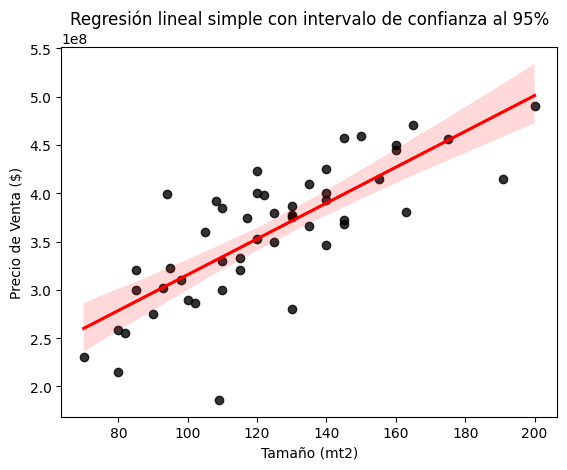

In [12]:
# Generar análisis
modelo = LinearRegression()
modelo.fit(df[[variable_x]], df[variable_y])
print ('Ecuación de la recta: y = ', round(modelo.coef_[0],3),'x + ', round(modelo.intercept_,3))#obtenemos la ecuación de la recta
print ('Coeficiente de correlación: ', round(np.corrcoef(df[variable_x], df[variable_y])[0,1], 3))#obtenemos el coeficiente de correlación
print ('Coeficiente de determinación: ', round(r2_score(df[variable_y], modelo.predict(df[[variable_x]])), 3))#obtenemos el coeficiente de determinación
# Gráfica con intervalo de confianza
sns.regplot(x=df[variable_x], y=df[variable_y], ci=95, line_kws={"color": "red"}, scatter_kws={"color": "black"})
plt.title('Regresión lineal simple con intervalo de confianza al 61.5%')
plt.show()

In [18]:
# Definir el dato predictor (por ejemplo, el tamaño del inmueble en m²)
dato_predictor = 100  # Por ejemplo, 100 m²

# Convertir el dato predictor en un DataFrame
nuevas_caracteristicas = pd.DataFrame([dato_predictor], columns=[variable_x])

# Realizar la predicción con el modelo entrenado
precio_prediccion = modelo.predict(nuevas_caracteristicas)

# Mostrar el resultado de la predicción
print(f'La predicción del precio de un inmueble con {nuevas_caracteristicas.iloc[0, 0]} m² es: ${round(precio_prediccion[0], 2)}')



La predicción del precio de un inmueble con 100 m² es: $315745781.64
